In [1]:
from monopoly_library.monopoly_main import Monopoly, Player

import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
import random
sns.set_style('whitegrid')
%matplotlib inline
import logging

# turn off logging
logger = logging.getLogger('my-logger')
logger.propagate = False

In [2]:
def summarise_monopoly_runs(a_list, a_board, drop_jail=False):
    
    """Summarises value counts of Monopoly games"""
    
    pd_temp = pd.DataFrame(a_list,columns=['Game','Player','Move','Location'])
    pd_temp.drop(labels=['Game', 'Player','Move'],axis=1,inplace=True)
    pd_temp = pd_temp.explode('Location')
    
    # If drop_jail is True, drop all instances of 10
    if drop_jail:
        
        pd_temp = pd_temp[pd_temp['Location'] != 10]
    
    
    
    pd_output = pd.DataFrame(pd_temp.value_counts(), columns=['Count'])
    pd_output.reset_index(level=0, inplace=True)
    
    pd_output['Location Name']= pd_output['Location'].apply(lambda x: a_board.board_file[x][0])
    pd_output['Colour']= pd_output['Location'].apply(lambda x: a_board.board_file[x][1])
    
    pd_output['Count %'] = pd_output['Count'] / pd_output['Count'].sum()
    
    return pd_output      

In [3]:
def create_monopoly_sample(num_games, num_players, num_test_moves_mean):
    
    """Creates a sample of Monopoly games"""
    """Generates tuple(game #, player #, move #, location)"""

    num_games = num_games
    num_players = num_players
    num_test_moves_mean = num_test_moves_mean
    game = Monopoly('./monopoly_library/monopoly_board_aus.txt', 
                        './monopoly_library/monopoly_chance_aus.csv', './monopoly_library/monopoly_community_aus.csv',
                   2)

    landed_locations = list()

    for i in tqdm(range(num_games)):
        
        game.refresh_game()        

        for player in range(num_players):
            
            player_test = Player(player_name='test_player',board=game)
            
            # normally distributed number of test moves in each game
            
            num_test_moves = int(random.gauss(mu=num_test_moves_mean, sigma=3))

            for move in range(num_test_moves):

                landed_locations.append((i, player, move, player_test.roll_turn()))
            
    return landed_locations

In [4]:
# assume number of test moves is normally distributed, mean = 30 

test_1 = create_monopoly_sample(num_games=30000,num_players=4,num_test_moves_mean=30)

100%|████████████████████████████████████████████████████████████████████████████| 30000/30000 [09:19<00:00, 53.62it/s]


In [5]:
pd_temp = pd.DataFrame(test_1,columns=['Game','Player','Move','Location'])
pd_temp.drop(labels=['Game', 'Player','Move'],axis=1,inplace=True)

pd_temp = pd_temp.explode(column='Location')

pd_temp.head()
# pd_output = pd.DataFrame(pd_temp.value_counts(), columns=['Count'])
# pd_output.reset_index(level=0, inplace=True)

# pd_output['Location Name']= pd_output['Location'].apply(lambda x: a_board.board_file[x][0])
# pd_output['Colour']= pd_output['Location'].apply(lambda x: a_board.board_file[x][1])

# pd_output['Count %'] = pd_output['Count'] / pd_output['Count'].sum()

,Location
0,4
0,14
0,21
1,28
2,34


In [6]:
game = Monopoly('./monopoly_library/monopoly_board_aus.txt', 
                        './monopoly_library/monopoly_chance_aus.csv', './monopoly_library/monopoly_community_aus.csv')

pd_sample = summarise_monopoly_runs(test_1, game)

In [7]:
pd_sample.head()

,Location,Count,Location Name,Colour,Count %
0,10,447171,Jail,NA,0.107213
1,24,125397,Trafalgar Square,Red,0.030065
2,5,123805,Kings Cross Station,Station,0.029683
3,25,120101,Fenchurch St. Station,Station,0.028795
4,18,119606,Marlborough Street,Orange,0.028677


In [8]:
pd_sample['Colour'].unique()

array(['NA', 'Red', 'Station', 'Orange', 'Pink', 'Utilities', 'Yellow',
       'Light Blue', 'Green', 'Dark Blue', 'Brown'], dtype=object)

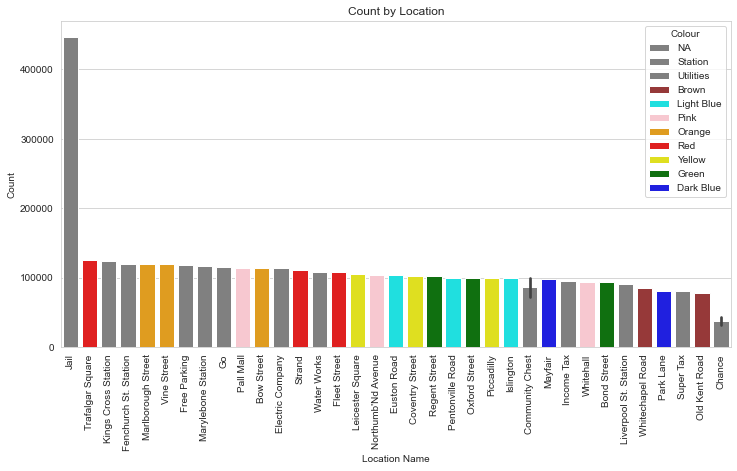

In [9]:
fig, ax = plt.subplots(figsize=(12,6))

hue_order = ['NA', 'Station', 'Utilities', 'Brown', 'Light Blue', 
             'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Dark Blue']

palette = ['Gray', 'Gray', 'Gray', 'Brown', 'Cyan',
          'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Blue']

sns.barplot(data=pd_sample, x='Location Name', y='Count', hue ='Colour', ax=ax, dodge=False, hue_order=hue_order,palette=palette)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Count by Location')

plt.show()

In [10]:
pd_sample.tail()

,Location,Count,Location Name,Colour,Count %
34,1,78413,Old Kent Road,Brown,0.018800
35,2,71730,Community Chest,NA,0.017198
36,22,43517,Chance,NA,0.010434
37,7,39444,Chance,NA,0.009457
38,36,32432,Chance,NA,0.007776


In [11]:
pd_sample_nojail = summarise_monopoly_runs(test_1, game, drop_jail=True)

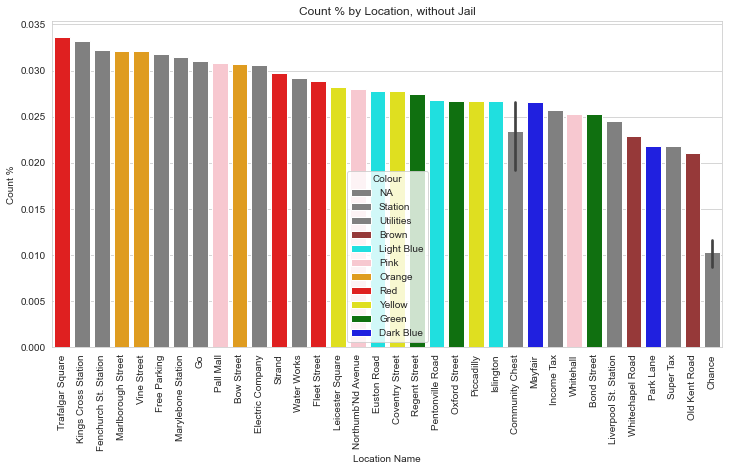

In [12]:
fig, ax = plt.subplots(figsize=(12,6))

hue_order = ['NA', 'Station', 'Utilities', 'Brown', 'Light Blue', 
             'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Dark Blue']

palette = ['Gray', 'Gray', 'Gray', 'Brown', 'Cyan',
          'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Blue']

sns.barplot(data=pd_sample_nojail, x='Location Name', y='Count %', hue ='Colour', ax=ax, dodge=False, hue_order=hue_order,palette=palette)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Count % by Location, without Jail')

plt.show()

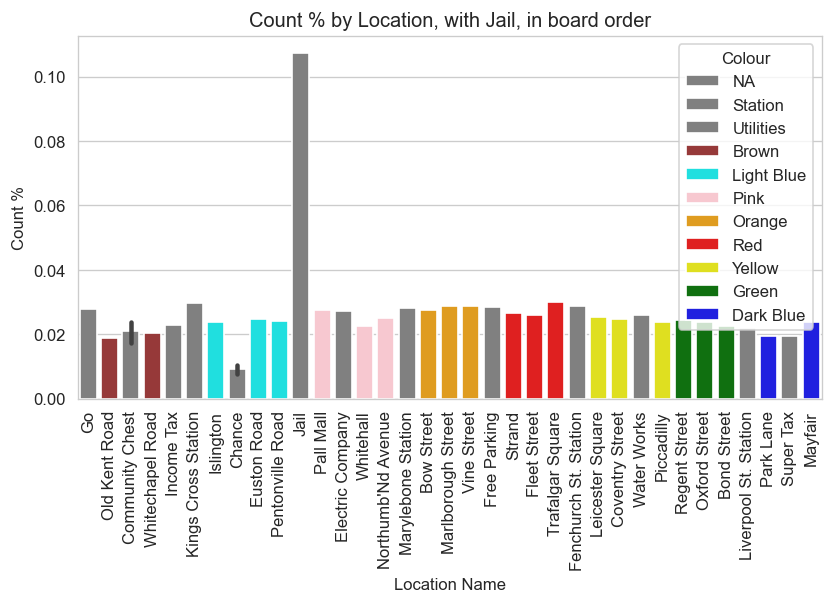

In [13]:
# Order by game location

pd_sample.sort_values(by='Location',inplace=True)

fig, ax = plt.subplots(figsize=(8,4), dpi =120)

hue_order = ['NA', 'Station', 'Utilities', 'Brown', 'Light Blue', 
             'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Dark Blue']

palette = ['Gray', 'Gray', 'Gray', 'Brown', 'Cyan',
          'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Blue']

sns.barplot(data=pd_sample, x='Location Name', y='Count %', hue ='Colour', ax=ax, dodge=False, hue_order=hue_order,palette=palette)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Count % by Location, with Jail, in board order')

plt.show()

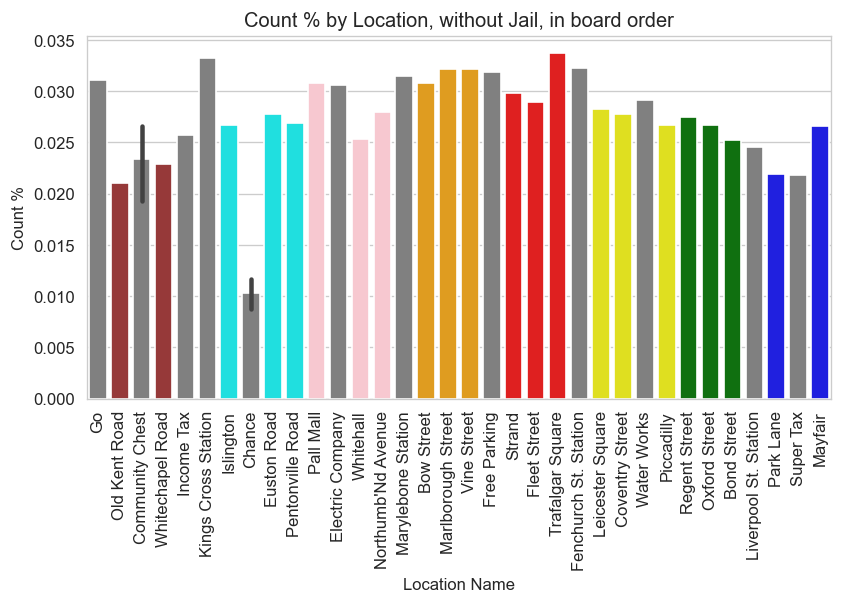

In [14]:
# Order by game location without Jail

pd_sample_nojail.sort_values(by='Location',inplace=True)

fig, ax = plt.subplots(figsize=(8,4), dpi =120)

hue_order = ['NA', 'Station', 'Utilities', 'Brown', 'Light Blue', 
             'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Dark Blue']

palette = ['Gray', 'Gray', 'Gray', 'Brown', 'Cyan',
          'Pink', 'Orange', 'Red', 'Yellow', 'Green', 'Blue']

sns.barplot(data=pd_sample_nojail, x='Location Name', y='Count %', hue ='Colour', ax=ax, dodge=False, hue_order=hue_order,palette=palette)

ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.set_title('Count % by Location, without Jail, in board order')
ax.get_legend().remove()

plt.show()

In [15]:
# Add go to jail for the purposes of creating a grid

row = [30, 0, 'Go to Jail', 'NA', 0.00]
pd_sample.loc[len(pd_sample)] = row

pd_sample = pd_sample.sort_values(by='Location')

pd_sample

,Location,Count,Location Name,Colour,Count %
8,0,115720,Go,NA,0.027745
34,1,78413,Old Kent Road,Brown,0.018800
35,2,71730,Community Chest,NA,0.017198
31,3,85163,Whitechapel Road,Brown,0.020419
26,4,95642,Income Tax,NA,0.022931
2,5,123805,Kings Cross Station,Station,0.029683
23,6,99392,Islington,Light Blue,0.023830
37,7,39444,Chance,NA,0.009457
17,8,103376,Euston Road,Light Blue,0.024785
20,9,99948,Pentonville Road,Light Blue,0.023963


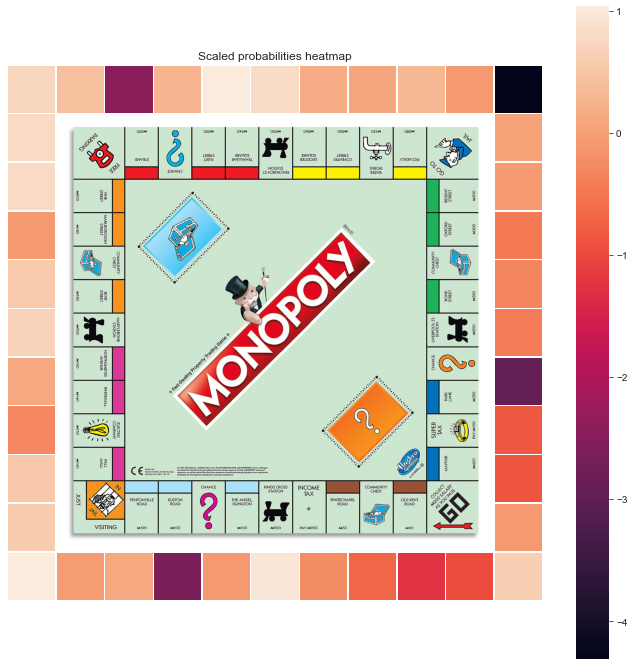

In [16]:
# Plot probabilities using heatmap in a fashion that represents the Monopoly board

# create 11 by 11 array
x = np.zeros(11)
y = np.zeros(11)
xx, yy = np.meshgrid(x, y, sparse=True)
grid = xx+yy

# create mask to not show inside
mask = grid.copy()
mask[1:-1,1:-1] = 1

# Plot in grid

from sklearn import preprocessing
perc = np.array(pd_sample.reset_index()['Count %']).reshape(-1,1)

perc[10] = 0.03 # manually scale outlier (have to do this as no scaler can even handle it)

scaler = preprocessing.RobustScaler().fit(perc)

perc_scaled = scaler.transform(perc)

perc = perc_scaled.reshape(-1,)

# print grid

# perc = pd_sample.reset_index()['Count %']
a=perc[:10][::-1]
b=perc[10:20][::-1]
c=perc[20:30]
d=perc[30:]
grid[-1,1:] = a
grid[1:,0] = b
grid[0, :10] = c
grid[:10, -1] = d

fig, ax = plt.subplots(figsize=(12,12))

sns.heatmap(grid, cmap='rocket',square=True,mask=mask, linewidths=.5, ax=ax)

ax.set_title('Scaled probabilities heatmap')
ax.axis('off')

# insert image

ax2 = plt.axes([0.186,0.255, 0.5, .5], frameon=True)
image = plt.imread('./monopoly_board.jpg')
ax2.imshow(image)
ax2.axis('off')

plt.show()

In [17]:
pd_sample.sort_values(by='Count %', ascending=False)

,Location,Count,Location Name,Colour,Count %
0,10,447171,Jail,NA,0.107213
1,24,125397,Trafalgar Square,Red,0.030065
2,5,123805,Kings Cross Station,Station,0.029683
3,25,120101,Fenchurch St. Station,Station,0.028795
4,18,119606,Marlborough Street,Orange,0.028677
5,19,119557,Vine Street,Orange,0.028665
6,20,118505,Free Parking,NA,0.028413
7,15,117137,Marylebone Station,Station,0.028085
8,0,115720,Go,NA,0.027745
9,11,114660,Pall Mall,Pink,0.027491


In [18]:
test_1

[(0, 0, 0, [4, 14, 21]),
 (0, 0, 1, [28]),
 (0, 0, 2, [34, 10]),
 (0, 0, 3, [10]),
 (0, 0, 4, [10]),
 (0, 0, 5, [15]),
 (0, 0, 6, [20]),
 (0, 0, 7, [25]),
 (0, 0, 8, [29]),
 (0, 0, 9, [33]),
 (0, 0, 10, [2]),
 (0, 0, 11, [13]),
 (0, 0, 12, [18]),
 (0, 0, 13, [10]),
 (0, 0, 14, [10]),
 (0, 0, 15, [10]),
 (0, 0, 16, [0]),
 (0, 0, 17, [9]),
 (0, 0, 18, [17]),
 (0, 0, 19, [27]),
 (0, 0, 20, [32]),
 (0, 0, 21, [2]),
 (0, 0, 22, [5]),
 (0, 0, 23, [12]),
 (0, 1, 0, [7]),
 (0, 1, 1, [13, 16]),
 (0, 1, 2, [24, 31]),
 (0, 1, 3, [37]),
 (0, 1, 4, [5]),
 (0, 1, 5, [13]),
 (0, 1, 6, [20]),
 (0, 1, 7, [27]),
 (0, 1, 8, [37]),
 (0, 1, 9, [39]),
 (0, 1, 10, [10]),
 (0, 1, 11, [19]),
 (0, 1, 12, [29, 11]),
 (0, 1, 13, [17]),
 (0, 1, 14, [25]),
 (0, 1, 15, [32]),
 (0, 1, 16, [37]),
 (0, 1, 17, [3]),
 (0, 1, 18, [10]),
 (0, 1, 19, [21]),
 (0, 1, 20, [26]),
 (0, 2, 0, [4]),
 (0, 2, 1, [12]),
 (0, 2, 2, [23]),
 (0, 2, 3, [31]),
 (0, 2, 4, [37]),
 (0, 2, 5, [6]),
 (0, 2, 6, [12]),
 (0, 2, 7, [20]),
 (0, 2, 